In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


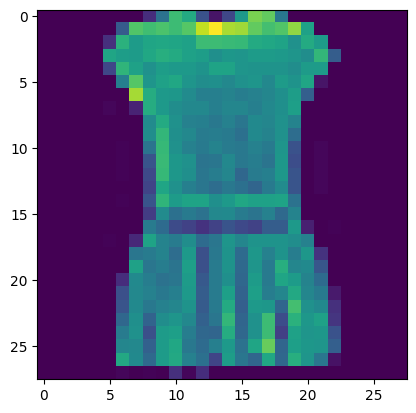

In [4]:
plt.imshow(x_train[3])

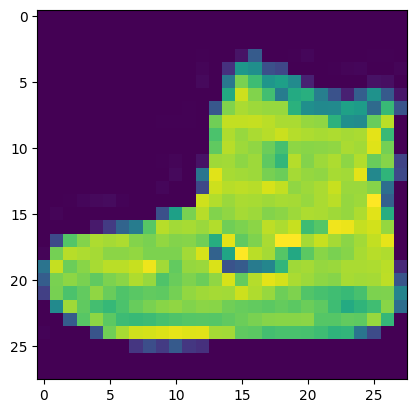

In [5]:
plt.imshow(x_train[0])

In [6]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and then reshaping the images to be 28x28 pixels.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# converting the training_images array to 4 dimensional array with sizes 60000, 28, 28, 1 for 0th to 3rd dimension.

x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [13]:
# We will use a convolutional neural network (CNN) to classify the fashion items.
# The CNN will consist of multiple convolutional layers followed by max pooling,
# dropout, and dense layers. Here is the code for the model:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # 32 filters (default), randomly initialized
    # 3*3 is Size of Filter
    # 28,28,1 size of Input Image
    # No zero-padding: every output 2 pixels less in every dimension
    # in Paramter shwon 320 is value of weights: (3x3 filter weights + 32 bias) * 32 filters
    # 32*3*3=288(Total)+32(bias)= 320

     keras.layers.MaxPooling2D((2,2)),
    # It shown 13 * 13 size image with 32 channel or filter or depth.

    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Deeper layers use 64 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x64 feature map
    # 13(Size)-3(Filter Size )+1(bias)=11 Size for Width and Height with 64 Depth or filtter or channel
    # in Paramter shwon 18496 is value of weights: (3x3 filter weights + 64 bias) * 64 filters
    # 64*3*3=576+1=577*32 + 32(bias)=18496

    keras.layers.MaxPooling2D((2,2)),
    # It shown 5 * 5 size image with 64 channel or filter or depth.

    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Deeper layers use 128 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x128 feature map
    # It show 5(Size)-3(Filter Size )+1(bias)=3 Size for Width and Height with 64 Depth or filtter or channel
    # 128*3*3=1152+1=1153*64 + 64(bias)= 73856

    # To classify the images, we still need a Dense and Softmax layer.
    # We need to flatten the 3x3x128 feature map to a vector of size 1152
    # https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # 128 Size of Node in Dense Layer
    # 1152*128 = 147584

    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
    # 10 Size of Node another Dense Layer
    # 128*10+10 bias= 1290
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7049 - loss: 0.7843 - val_accuracy: 0.8525 - val_loss: 0.4007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.8587 - loss: 0.3828 - val_accuracy: 0.8794 - val_loss: 0.3264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.8785 - loss: 0.3270 - val_accuracy: 0.8897 - val_loss: 0.3017
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8920 - loss: 0.2927 - val_accuracy: 0.8972 - val_loss: 0.2759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.8984 - loss: 0.2739 - val_accuracy: 0.9032 - val_loss: 0.2633
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9018 - loss: 0.2648 - val_accuracy: 0.9038 - val_loss: 0.2607
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9072 - loss: 0.2474 - val_accuracy: 0.8922 - val_loss: 0.2978
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9096 -

In [16]:
# Finally, we will evaluate the performance of the model on the test data.

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9074 - loss: 0.2681
Test accuracy: 0.904699981212616
